# Enlace con github para obtener los conjuntos de datos

In [ ]:
# Enlace con github
!git clone https://github.com/p72losaj/Introduccion_Mineria_Datos.git

Cloning into 'Introduccion_Mineria_Datos'...
remote: Enumerating objects: 556, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 556 (delta 70), reused 73 (delta 32), pack-reused 403
Receiving objects: 100% (556/556), 18.32 MiB | 11.61 MiB/s, done.
Resolving deltas: 100% (202/202), done.


# Metodos de clasificacion

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

# Funciones

# Cargar un dataset

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
# Función que carga un dataset
def leerArchivo(url,colNames):
     dataset =pd.read_csv(url,header=None,names=colNames)
     return dataset

# Calcula de precision de un dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


def precisionDataset(dataset,features,label,modelo):
     precision =0
     X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)
     modelo.fit(X_train,y_train)
     y_pred = modelo.predict(X_test)
     precision = metrics.accuracy_score(y_test,y_pred)
     return precision

def precisionDatasetEstandarizado(dataset,features,label,modelo,n):
     precision =0
     X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)
     # Standardize the data
     scaler = StandardScaler()
     scaler.fit(X_train)
     X_train = scaler.transform(X_train)
     X_test = scaler.transform(X_test)
     # Aplicamos PCA de n dimensiones
     pca=PCA(n_components=n)
     pca.fit(X_train)
     # Fit and transform data 2D
     X_train = pca.fit_transform(X_train)
     X_test = pca.transform(X_test)
     # Entrenamos el modelo
     modelo.fit(X_train,y_train)
     # Predicciones del modelo
     y_pred = modelo.predict(X_test)
     # Calculamos la precision del modelo
     precision = metrics.accuracy_score(y_test,y_pred)
     return precision

def muestreoAleatorio(dataset,features,label,modelo):
  precision = 0;
  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=0)
  modelo.fit(X_train,y_train)
  y_pred = modelo.predict(X_test)
  precision = metrics.accuracy_score(y_test,y_pred)
  return precision;

def muestreoEstratificado(dataset,features,label,modelo):
  precision = 0;
  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=0,stratify=label)
  modelo.fit(X_train,y_train)
  y_pred = modelo.predict(X_test)
  precision = metrics.accuracy_score(y_test,y_pred)
  return precision;

def PrecisionSimpleImputer(metodo1, metodo2):
  # SimpleImputer es una clase que permite rellenar valores faltantes en un array de numpy
  breast_cancer_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
  # Ajustamos el imputer a los datos
  breast_cancer_imputer.fit(breast_cancer_X)
  # Transformamos los datos
  X_breast_cancer = breast_cancer_imputer.transform(breast_cancer_X)
  # Split data into training and test sets
  X_train_breast_cancer, X_test_breast_cancer, y_train_breast_cancer, y_test_breast_cancer = train_test_split(X_breast_cancer, breast_cancer_Y, test_size=0.1, random_state=0)
  # Entrenamos el modelo arbol de decision
  metodo1.fit(X_train_breast_cancer, y_train_breast_cancer)
  y_pred_arbol = metodo1.predict(X_test_breast_cancer)
  metodo1_precision = metrics.accuracy_score(y_test_breast_cancer, y_pred_arbol)

  # Entrenamos el modelo KNN
  metodo2.fit(X_train_breast_cancer, y_train_breast_cancer)
  y_pred_knn = metodo2.predict(X_test_breast_cancer)
  metodo2_precision = metrics.accuracy_score(y_test_breast_cancer, y_pred_knn)
  return metodo1_precision, metodo2_precision


def PrecisionIterativeImputer(metodo1, metodo2):
  # SimpleImputer es una clase que permite rellenar valores faltantes en un array de numpy
  breast_cancer_imputer = IterativeImputer(max_iter=10, random_state=0)
  # Ajustamos el imputer a los datos
  breast_cancer_imputer.fit(breast_cancer_X)
  # Transformamos los datos
  X_breast_cancer = breast_cancer_imputer.transform(breast_cancer_X)
  # Split data into training and test sets
  X_train_breast_cancer, X_test_breast_cancer, y_train_breast_cancer, y_test_breast_cancer = train_test_split(X_breast_cancer, breast_cancer_Y, test_size=0.1, random_state=0)
  # Entrenamos el modelo arbol de decision
  metodo1.fit(X_train_breast_cancer, y_train_breast_cancer)
  y_pred_arbol = metodo1.predict(X_test_breast_cancer)
  metodo1_precision = metrics.accuracy_score(y_test_breast_cancer, y_pred_arbol)

  # Entrenamos el modelo KNN
  metodo2.fit(X_train_breast_cancer, y_train_breast_cancer)
  y_pred_knn = metodo2.predict(X_test_breast_cancer)
  metodo2_precision = metrics.accuracy_score(y_test_breast_cancer, y_pred_knn)
  return metodo1_precision, metodo2_precision


# Grafico de comparacion de 2 metodos de clasificacion

In [ ]:
import matplotlib.pyplot as plt
def generarGraficoPrecision(datasets,precision1,precision2,cadena1,cadena2):
    plt.plot(datasets, precision1, label=cadena1+'_precision')
    plt.plot(datasets, precision2, label=cadena2+'_precision')
    plt.xlabel('Datasets')
    plt.ylabel('Precision')
    plt.title(cadena1+" vs " + cadena2) 
    plt.legend()
    plt.show()
def generarGraficoError(datasets,error1,error2,cadena1,cadena2):
    plt.plot(datasets, error1, label=cadena1+'_error')
    plt.plot(datasets, error2, label=cadena2+'_error')
    plt.xlabel('Datasets')
    plt.ylabel('Error')
    plt.title(cadena1+" vs " + cadena2) 
    plt.legend()
    plt.show()

# Funcion que genera una matriz de confusion

In [ ]:
from sklearn.metrics import confusion_matrix
def generarMatrizConfusion(dataset,modelo,features,label):
     X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)
     modelo.fit(X_train,y_train)
     y_pred = modelo.predict(X_test)
     print(confusion_matrix(y_test,y_pred))

# Practica1 Parte 1

# Ejercicio 1. Obtenemos 5 ejemplos de datos en formato CSV, ARFF u otro cualquiera de: Weka datasets, UCI MLR

In [ ]:
# Dataset iris
iris = leerArchivo('/content/Introduccion_Mineria_Datos/PRACTICAS/misDatasets/iris.data',
["sepal length","sepal width","petal length","petal width","class"])
iris_features= ["sepal length","sepal width","petal length","petal width"]
iris_X=iris[iris_features]
iris_y=iris["class"]

# Dataset wine.data
wine = leerArchivo('/content/Introduccion_Mineria_Datos/PRACTICAS/misDatasets/wine.data',
                   ['class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
             'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315',
             'Proline'])
col_features = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 
                'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 
                'OD280/OD315', 'Proline']
wine_X=wine[col_features]
wine_y=wine['class']

# Dataset diabetes.csv
diabetes = leerArchivo('/content/Introduccion_Mineria_Datos/PRACTICAS/misDatasets/diabetes.csv',
                       colNames = ['preg', 'plas','pres','skin','insu','mass','pedi','age','class'])
col_features= ['preg', 'plas','pres','skin','insu','mass','pedi','age']
diabetes_X = diabetes[col_features]
diabetes_y = diabetes['class']

# Dataset Breast Cancer 
breast_cancer = load_breast_cancer()
breast_cancer_X = breast_cancer.data
breast_cancer_Y = breast_cancer.target

# Dataset cpu
cpu = leerArchivo('/content/Introduccion_Mineria_Datos/PRACTICAS/misDatasets/cpu.csv',
                       colNames=['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','class'])
col_features = ['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']
cpu_X = cpu[col_features]
cpu_y = cpu['class']



# Ejercicio 2. Evalúe el árbol de decisión y el vecino más cercano sobre los datos originales

Calculamos la precision de ambos modelos y almacenamos los resultados

In [ ]:
datasets=[]
arbol_precision = []
knn_precision = []
# Dataset iris
datasets.append('iris')
arbol_precision.append(precisionDataset(iris,iris_X,iris_y,arbol))
knn_precision.append(precisionDataset(iris,iris_X,iris_y,knn))

# Anadimos el dataset wine
datasets.append('wine')
arbol_precision.append(precisionDataset(wine,wine_X,wine_y,arbol))
knn_precision.append(precisionDataset(wine,wine_X,wine_y,knn))

# Dataset diabetes
datasets.append('diabetes')
arbol_precision.append(precisionDataset(diabetes,diabetes_X,diabetes_y,arbol))
knn_precision.append(precisionDataset(diabetes,diabetes_X,diabetes_y,knn))

# Dataset breast-cancer
datasets.append("breast-cancer")
arbol_precision.append(precisionDataset(breast_cancer,breast_cancer_X,breast_cancer_Y,arbol))
knn_precision.append(precisionDataset(breast_cancer,breast_cancer_X,breast_cancer_Y,knn))

# Dataset cpu
datasets.append("cpu")
arbol_precision.append(precisionDataset(cpu,cpu_X,cpu_y,arbol))
knn_precision.append(precisionDataset(cpu,cpu_X,cpu_y,knn))

Representamos gráficamente los resultados

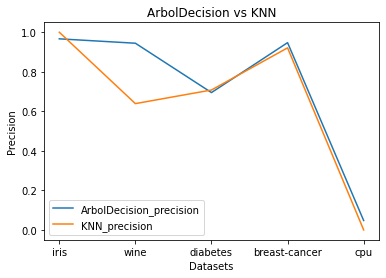

In [ ]:
generarGraficoPrecision(datasets, arbol_precision, knn_precision, "ArbolDecision", "KNN")

Generamos la matriz de confusión del árbol de decisión

In [ ]:
print('Iris Dataset')
generarMatrizConfusion(iris,arbol,iris_X,iris_y)
print('Wine Dataset')
generarMatrizConfusion(wine,arbol,wine_X,wine_y)
print('Diabetes Dataset')
generarMatrizConfusion(diabetes,arbol,diabetes_X,diabetes_y)
print('Breast Cancer Dataset')
generarMatrizConfusion(breast_cancer,arbol,breast_cancer_X,breast_cancer_Y)
print('Cpu dataset')
generarMatrizConfusion(cpu,arbol,cpu_X,cpu_y)


Iris Dataset
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Wine Dataset
[[14  0  0]
 [ 1 12  0]
 [ 0  2  7]]
Diabetes Dataset
[[76 23]
 [23 32]]
Breast Cancer Dataset
[[38  4]
 [ 1 71]]
Cpu dataset
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


Generamos las matrices de confusion del KNN

In [ ]:
print('Iris Dataset')
generarMatrizConfusion(iris,knn,iris_X,iris_y)
print('Wine Dataset')
generarMatrizConfusion(wine,knn,wine_X,wine_y)
print('Diabetes Dataset')
generarMatrizConfusion(diabetes,knn,diabetes_X,diabetes_y)
print('Breast Cancer Dataset')
generarMatrizConfusion(breast_cancer,knn,breast_cancer_X,breast_cancer_Y)
print('Cpu dataset')
generarMatrizConfusion(cpu,knn,cpu_X,cpu_y)

Iris Dataset
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Wine Dataset
[[12  0  2]
 [ 2  8  3]
 [ 1  5  3]]
Diabetes Dataset
[[83 16]
 [29 26]]
Breast Cancer Dataset
[[36  6]
 [ 3 69]]
Cpu dataset
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Ejercicio 3. Estudiamos el efecto de la normalizacion y la estandarización sobre el error de clasificacion usando arbol de decision y el vecino mas cercano

Aplicamos normalizacion a los datos de los dataset y obtenemos la precision de ambos modelos de clasificación

In [ ]:
from sklearn import preprocessing
datasets=[]
# Creamos el modelo del árbol de decisión 

arbol_error =[];knn_error = []
# Anadimos el dataset
datasets.append('iris')
# Normalizacion de los datos
iris_X_norm = preprocessing.normalize(iris_X)
arbol_error.append(1-precisionDataset(iris,iris_X_norm,iris_y,arbol))
knn_error.append(1-precisionDataset(iris,iris_X_norm,iris_y,knn))

# Anadimos el dataset wine
datasets.append('wine')
wine_X_norm = preprocessing.normalize(wine_X)
arbol_error.append(1-precisionDataset(wine,wine_X_norm,wine_y,arbol))
knn_error.append(1-precisionDataset(wine,wine_X_norm,wine_y,knn))

# Dataset diabetes
datasets.append("diabetes")
diabetes_X_norm = preprocessing.normalize(diabetes_X)
arbol_error.append(1-precisionDataset(diabetes,diabetes_X_norm,diabetes_y,arbol))
knn_error.append(1-precisionDataset(diabetes,diabetes_X_norm,diabetes_y,knn))

# Dataset breast-cancer
datasets.append("breast-cancer")
breast_cancer_X_norm = preprocessing.normalize(breast_cancer_X)
arbol_error.append(1-precisionDataset(breast_cancer,breast_cancer_X_norm,breast_cancer_Y,arbol))
knn_error.append(1-precisionDataset(breast_cancer,breast_cancer_X_norm,breast_cancer_Y,knn))

# Dataset cpu
datasets.append('cpu')
cpu_X_norm = preprocessing.normalize(cpu_X)
arbol_error.append(1-precisionDataset(cpu,cpu_X_norm,cpu_y,arbol))
knn_error.append(1-precisionDataset(cpu,cpu_X_norm,cpu_y,knn))

Mostramos los resultados obtenidos

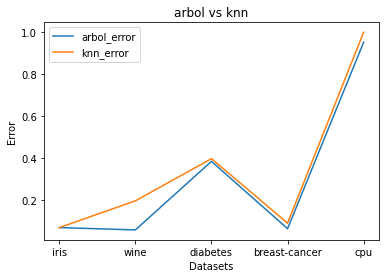

In [ ]:
generarGraficoError(datasets,arbol_error,knn_error,"arbol","knn")

Realizamos un estudio de la estandarización sobre los datasets empleados

In [ ]:
datasets=[]
# Creamos el modelo del árbol de decisión 
arbol_error =[];knn_error = []
# Anadimos el dataset
datasets.append('iris')
# Normalizacion de los datos
iris_X_preprocessing = preprocessing.scale(iris_X)
arbol_error.append(1-precisionDataset(iris,iris_X_preprocessing,iris_y,arbol))
knn_error.append(1-precisionDataset(iris,iris_X_preprocessing,iris_y,knn))

# Anadimos el dataset wine
datasets.append('wine')
wine_X_preprocessing = preprocessing.scale(wine_X)
arbol_error.append(1-precisionDataset(wine,wine_X_preprocessing,wine_y,arbol))
knn_error.append(1-precisionDataset(wine,wine_X_preprocessing,wine_y,knn))

# Dataset diabetes
datasets.append("diabetes")
diabetes_X_preprocessing = preprocessing.scale(diabetes_X)
arbol_error.append(1-precisionDataset(diabetes,diabetes_X_preprocessing,diabetes_y,arbol))
knn_error.append(1-precisionDataset(diabetes,diabetes_X_preprocessing,diabetes_y,knn))

# Dataset breast-cancer
datasets.append("breast-cancer")
breast_cancer_X_preprocessing = preprocessing.scale(breast_cancer_X)
arbol_error.append(1-precisionDataset(breast_cancer,breast_cancer_X_preprocessing,breast_cancer_Y,arbol))
knn_error.append(1-precisionDataset(breast_cancer,breast_cancer_X_preprocessing,breast_cancer_Y,knn))

# Dataset cpu
datasets.append('cpu')
cpu_X_preprocessing = preprocessing.scale(cpu_X)
arbol_error.append(1-precisionDataset(cpu,cpu_X_preprocessing,cpu_y,arbol))
knn_error.append(1-precisionDataset(cpu,cpu_X_preprocessing,cpu_y,knn))

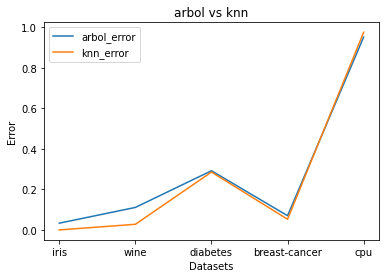

In [ ]:
generarGraficoError(datasets,arbol_error,knn_error,"arbol","knn")

# Ejercicio 4. Estudiamos el efecto del análisis en componentes principales sobre el árbol de decisión y el vecino más cercano, para 2 componentes

In [ ]:
datasets=[]
arbol_precision = []
knn_precision = []
# Dataset iris
datasets.append('iris')
arbol_precision.append(precisionDatasetEstandarizado(iris,iris_X,iris_y,arbol,2))
knn_precision.append(precisionDatasetEstandarizado(iris,iris_X,iris_y,knn,2))

# Dataset wine
datasets.append('wine')
arbol_precision.append(precisionDatasetEstandarizado(wine,wine_X,wine_y,arbol,2))
knn_precision.append(precisionDatasetEstandarizado(wine,wine_X,wine_y,knn,2))

# Dataset diabetes
datasets.append('diabetes')
arbol_precision.append(precisionDatasetEstandarizado(diabetes,diabetes_X,diabetes_y,arbol,2))
knn_precision.append(precisionDatasetEstandarizado(diabetes,diabetes_X,diabetes_y,knn,2))

# Dataset breast-cancer
datasets.append("breast-cancer")
arbol_precision.append(precisionDatasetEstandarizado(breast_cancer,breast_cancer_X,breast_cancer_Y,arbol,2))
knn_precision.append(precisionDatasetEstandarizado(breast_cancer,breast_cancer_X,breast_cancer_Y,knn,2))

# Dataset cpu
datasets.append('cpu')
arbol_precision.append(precisionDatasetEstandarizado(cpu,cpu_X,cpu_y,arbol,2))
knn_precision.append(precisionDatasetEstandarizado(cpu,cpu_X,cpu_y,knn,2))


Mostramos los resultados gráficamente

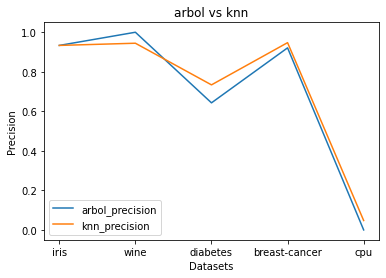

In [ ]:
generarGraficoPrecision(datasets,arbol_precision,knn_precision,"arbol","knn")

Realizamos el estudio aplicando 3 componentes:

In [ ]:
datasets=[]
arbol_precision = []
knn_precision = []
# Dataset iris
datasets.append('iris')
arbol_precision.append(precisionDatasetEstandarizado(iris,iris_X,iris_y,arbol,3))
knn_precision.append(precisionDatasetEstandarizado(iris,iris_X,iris_y,knn,3))

# Dataset wine
datasets.append('wine')
arbol_precision.append(precisionDatasetEstandarizado(wine,wine_X,wine_y,arbol,3))
knn_precision.append(precisionDatasetEstandarizado(wine,wine_X,wine_y,knn,3))

# Dataset diabetes
datasets.append('diabetes')
arbol_precision.append(precisionDatasetEstandarizado(diabetes,diabetes_X,diabetes_y,arbol,3))
knn_precision.append(precisionDatasetEstandarizado(diabetes,diabetes_X,diabetes_y,knn,3))

# Dataset breast-cancer
datasets.append("breast-cancer")
arbol_precision.append(precisionDatasetEstandarizado(breast_cancer,breast_cancer_X,breast_cancer_Y,arbol,3))
knn_precision.append(precisionDatasetEstandarizado(breast_cancer,breast_cancer_X,breast_cancer_Y,knn,3))

# Dataset cpu
datasets.append('cpu')
arbol_precision.append(precisionDatasetEstandarizado(cpu,cpu_X,cpu_y,arbol,3))
knn_precision.append(precisionDatasetEstandarizado(cpu,cpu_X,cpu_y,knn,3))


Mostramos los resultados obtenidos de forma grafica:

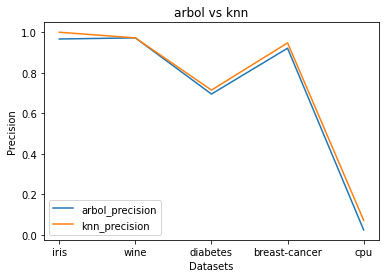

In [ ]:
generarGraficoPrecision(datasets,arbol_precision,knn_precision,"arbol","knn")

# Ejercicicio 5. Estudie el efecto del muestreo aleatorio del 10% de las instancias sin reemplazamiento sobre el árbol de decisión y el vecino más cercano.
# Compare los resultados con un muestreo del mismo porcentaje pero estratificado


Aplicamos muestreo aleatorio del 10% de las instancias sin reemplazamiento

In [ ]:
datasets=[]
arbol_precision = []; knn_precision=[]

# Anadimos el dataset
datasets.append('iris')
arbol_precision.append(muestreoAleatorio(iris,iris_X,iris_y,arbol))
knn_precision.append(muestreoAleatorio(iris,iris_X,iris_y,knn))

# Anadimos el dataset wine
datasets.append('wine')
arbol_precision.append(muestreoAleatorio(wine,wine_X,wine_y,arbol))
knn_precision.append(muestreoAleatorio(wine,wine_X,wine_y,knn))

# Dataset diabetes
datasets.append('diabetes')
arbol_precision.append(muestreoAleatorio(diabetes,diabetes_X,diabetes_y,arbol))
knn_precision.append(muestreoAleatorio(diabetes,diabetes_X,diabetes_y,knn))

# Dataset breast-cancer
datasets.append("breast-cancer")
arbol_precision.append(muestreoAleatorio(breast_cancer,breast_cancer_X,breast_cancer_Y,arbol))
knn_precision.append(muestreoAleatorio(breast_cancer,breast_cancer_X,breast_cancer_Y,knn))

# Dataset cpu
datasets.append('cpu')
arbol_precision.append(muestreoAleatorio(cpu,cpu_X,cpu_y,arbol))
knn_precision.append(muestreoAleatorio(cpu,cpu_X,cpu_y,knn))

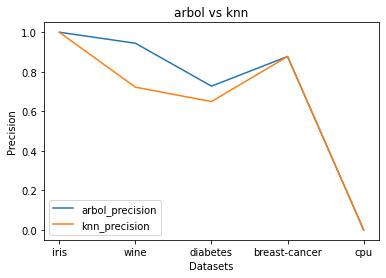

In [ ]:
generarGraficoPrecision(datasets,arbol_precision,knn_precision,"arbol","knn")

Aplicamos muestreo del 10% estratificado

In [ ]:
datasets=[]
arbol_precision = []; knn_precision=[]

# Anadimos el dataset
datasets.append('iris')
arbol_precision.append(muestreoEstratificado(iris,iris_X,iris_y,arbol))
knn_precision.append(muestreoEstratificado(iris,iris_X,iris_y,knn))

# Anadimos el dataset wine
datasets.append('wine')
arbol_precision.append(muestreoEstratificado(wine,wine_X,wine_y,arbol))
knn_precision.append(muestreoEstratificado(wine,wine_X,wine_y,knn))

# Dataset diabetes
datasets.append('diabetes')
arbol_precision.append(muestreoEstratificado(diabetes,diabetes_X,diabetes_y,arbol))
knn_precision.append(muestreoEstratificado(diabetes,diabetes_X,diabetes_y,knn))

# Dataset breast-cancer
datasets.append("breast-cancer")
arbol_precision.append(muestreoEstratificado(breast_cancer,breast_cancer_X,breast_cancer_Y,arbol))
knn_precision.append(muestreoEstratificado(breast_cancer,breast_cancer_X,breast_cancer_Y,knn))


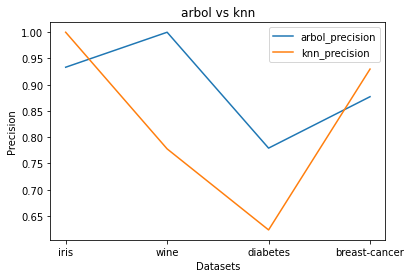

In [ ]:
generarGraficoPrecision(datasets,arbol_precision,knn_precision,"arbol","knn")

# Ejercicio 6. Realizamos un estudio de los métodos "SimpleImputer" y "Iterativa Imputer"

Aplicamos el método SimpleImputer

In [ ]:
arbol_precision, knn_precision = PrecisionSimpleImputer(arbol,knn)
# Mostramos los resultados
print("Precision del arbol de decision: ", arbol_precision)
print("Precision del KNN: ", knn_precision)

Precision del arbol de decision:  0.9122807017543859
Precision del KNN:  0.8771929824561403


Aplicamos el método IterativeComputer

In [ ]:
arbol_precision, knn_precision = PrecisionIterativeImputer(arbol,knn)
# Mostramos los resultados
print("Precision del arbol de decision: ", arbol_precision)
print("Precision del KNN: ", knn_precision)

Precision del arbol de decision:  0.9122807017543859
Precision del KNN:  0.8771929824561403


# Ejercicio 7. Selección de características

Realizamos un estudio aplicando RFECV

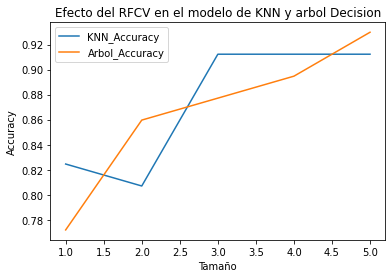

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.feature_selection import RFECV
import seaborn as sns
nElementos = []
arbol_accuracy = []
knn_accuracy = []
#  Using RFECV
rfecv = RFECV(estimator=arbol, step=1, cv=5, scoring='accuracy')
rfecv.fit(breast_cancer_X, breast_cancer_Y)
rfecv.fit(breast_cancer_X, breast_cancer_Y)
# Eliminamos las columnas que no son relevantes
breast_cancer_X = breast_cancer_X[:,rfecv.support_]
# Split data into training and test sets
X_train_breast_cancer, X_test_breast_cancer, y_train_breast_cancer, y_test_breast_cancer = train_test_split(breast_cancer_X, breast_cancer_Y, test_size=0.1, random_state=0)
# Creamos el modelo de KNN
knn.fit(X_train_breast_cancer, y_train_breast_cancer)
arbol.fit(X_train_breast_cancer, y_train_breast_cancer)
# Estudiamos el efecto del RFECV en el modelo de KNN
for i in range(1, X_train_breast_cancer.shape[1]+1):
    # Creamos el modelo de KNN
    knn.fit(X_train_breast_cancer[:,0:i], y_train_breast_cancer)
    # Creamos el modelo de arbol
    arbol.fit(X_train_breast_cancer[:,0:i], y_train_breast_cancer)
    # Calculamos el accuracy del modelo
    knn_accuracy.append(knn.score(X_test_breast_cancer[:,0:i], y_test_breast_cancer))
    arbol_accuracy.append(arbol.score(X_test_breast_cancer[:,0:i], y_test_breast_cancer))
    # Anadimos el elemento
    nElementos.append(i)

# Creamos dataframe para ambos modelos
df_knn = pd.DataFrame({'Tamaño': nElementos, 'Accuracy': knn_accuracy})
# Creamos el dataframe para el grafico de arbol
df_arbol = pd.DataFrame({'Tamaño': nElementos, 'Accuracy': arbol_accuracy})

# Mostramos los resultados obtenidos
sns.lineplot(data=df_knn, x="Tamaño", y="Accuracy", label="KNN_Accuracy")
sns.lineplot(data=df_arbol, x="Tamaño", y="Accuracy", label="Arbol_Accuracy")
plt.title("Efecto del RFCV en el modelo de KNN y arbol Decision")
plt.show()
plt.clf()



A continuación, realizamos un estudio de la selección secuencial de características:

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
arbol_accuracy = []
knn_accuracy = []
nElementos = []
sfs = SequentialFeatureSelector(arbol, n_features_to_select=5, direction='backward')
sfs.fit(breast_cancer_X, breast_cancer_Y)
# Eliminamos las columnas que no son relevantes
X_breast_cancer = breast_cancer_X[:,sfs.get_support()]

# Split data into training and test sets
X_train_breast_cancer, X_test_breast_cancer, y_train_breast_cancer, y_test_breast_cancer = train_test_split(X_breast_cancer, breast_cancer_Y, test_size=0.1, random_state=0)

knn.fit(X_train_breast_cancer, y_train_breast_cancer)
arbol.fit(X_train_breast_cancer, y_train_breast_cancer)

# Estudiamos el efecto del SequentialFeatureSelector en el modelo de KNN
for i in range(1, X_train_breast_cancer.shape[1]+1):
    # Creamos el modelo de KNN
    knn.fit(X_train_breast_cancer[:,0:i], y_train_breast_cancer)
    # Creamos el modelo de arbol
    arbol.fit(X_train_breast_cancer[:,0:i], y_train_breast_cancer)
    # Calculamos el accuracy del modelo
    knn_accuracy.append(knn.score(X_test_breast_cancer[:,0:i], y_test_breast_cancer))
    arbol_accuracy.append(arbol.score(X_test_breast_cancer[:,0:i], y_test_breast_cancer))
    # Añadimos el tamaño de los datos
    nElementos.append(i)

print("Elementos: ", nElementos)
print("Arbol precision: ", arbol_accuracy)
print("Knn precision: ", knn_accuracy)

Elementos:  [1, 2, 3, 4, 5]
Arbol precision:  [0.7719298245614035, 0.8596491228070176, 0.8947368421052632, 0.8771929824561403, 0.9649122807017544]
Knn precision:  [0.8245614035087719, 0.8070175438596491, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632]


Mostramos los resultados gráficamente

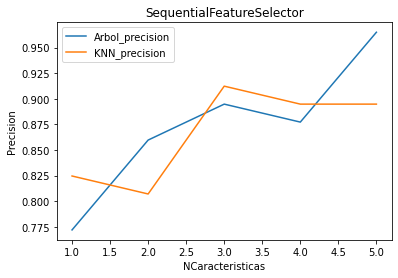

In [ ]:
plt.plot(nElementos, arbol_accuracy, label='Arbol_precision')
plt.plot(nElementos, knn_accuracy, label='KNN_precision')
plt.xlabel('NCaracteristicas')
plt.ylabel('Precision')
plt.title('SequentialFeatureSelector')
plt.legend()
plt.show()

# Ejercicio 8. Discretizacion

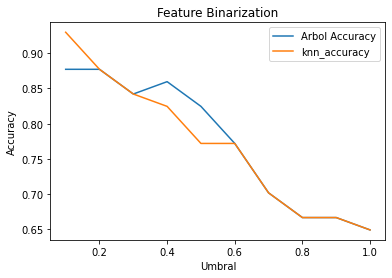

In [ ]:
from sklearn.preprocessing import Binarizer
# Cargamos el archivo breast cancer
breast_cancer = load_breast_cancer()
X_breast_cancer = breast_cancer.data
y_breast_cancer = breast_cancer.target
# Modelos de clasificacion
arbol = DecisionTreeClassifier()
arbol_accuracy = []
knn = KNeighborsClassifier(n_neighbors=3)
knn_accuracy = []
umbral = []
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_breast_cancer, y_breast_cancer, test_size=0.1, random_state=0)


# Estudiamos el efecto de la binarizacion en el modelo de KNN
for i in range(1, 11):
    # Creamos el modelo de binarizacion
    binarizer = Binarizer(threshold=i/10)
    # Binarizamos los datos de entrenamiento
    X_train_binarized = binarizer.fit_transform(X_train)
    # Binarizamos los datos de test
    X_test_binarized = binarizer.fit_transform(X_test)
    # Creamos el modelo de KNN
    knn.fit(X_train_binarized, y_train)
    # Creamos el modelo de arbol
    arbol.fit(X_train_binarized, y_train)
    # Calculamos el accuracy del modelo de KNN
    knn_accuracy.append(knn.score(X_test_binarized, y_test))
    # Calculamos el accuracy del modelo de arbol
    arbol_accuracy.append(arbol.score(X_test_binarized, y_test))
    
    # Guardamos el valor de la binarizacion
    umbral.append(i/10)

# Creamos el grafico de accuracy
plt.clf()
plt.plot(umbral, arbol_accuracy, label='Arbol Accuracy')
plt.plot(umbral, knn_accuracy, label='knn_accuracy')
plt.xlabel('Umbral')
plt.ylabel('Accuracy')
plt.title("Feature Binarization")
plt.legend()
plt.show()



# Practica 1 Parte 2

# Ejercicio 1. Obtenemos 5 ejemplos de datos en formato CSV, ARFF u otro cualquiera de: Weka datasets, UCI MLR

In [ ]:
# Dataset iris
iris = leerArchivo('/content/Introduccion_Mineria_Datos/PRACTICAS/misDatasets/iris.data',
["sepal length","sepal width","petal length","petal width","class"])
iris_features= ["sepal length","sepal width","petal length","petal width"]
iris_X=iris[iris_features]
iris_y=iris["class"]

# Dataset wine.data
wine = leerArchivo('/content/Introduccion_Mineria_Datos/PRACTICAS/misDatasets/wine.data',
                   ['class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
             'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315',
             'Proline'])
wine_features = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 
                'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 
                'OD280/OD315', 'Proline']
wine_X=wine[wine_features]
wine_y=wine['class']

# Dataset diabetes.csv
diabetes = leerArchivo('/content/Introduccion_Mineria_Datos/PRACTICAS/misDatasets/diabetes.csv',
                       colNames = ['preg', 'plas','pres','skin','insu','mass','pedi','age','class'])
diabetes_features= ['preg', 'plas','pres','skin','insu','mass','pedi','age']
diabetes_X = diabetes[diabetes_features]
diabetes_y = diabetes['class']

# Dataset Breast Cancer 

breast_cancer = load_breast_cancer()
breast_cancer_X = breast_cancer.data
breast_cancer_Y = breast_cancer.target

# Dataset cpu
cpu = leerArchivo('/content/Introduccion_Mineria_Datos/PRACTICAS/misDatasets/cpu.csv',
                       colNames=['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','class'])
cpu_features = ['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']
cpu_X = cpu[cpu_features]
cpu_y = cpu['class']



# Ejercicio 2. Realice un box plots de los datasets

Generamos el boxplots del dataset iris

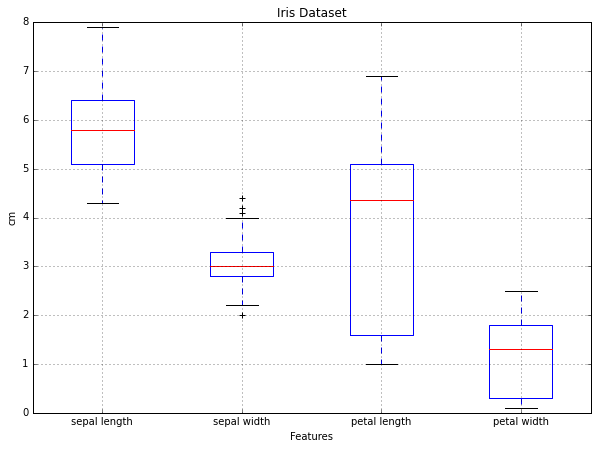

In [ ]:
import matplotlib.pyplot as plt
# Dataset iris
plt.figure(figsize = (10, 7))
plt.title('Iris Dataset')
plt.xlabel('Features')
plt.ylabel('cm')
iris_X.boxplot()

Generamos el boxplot del dataset wine

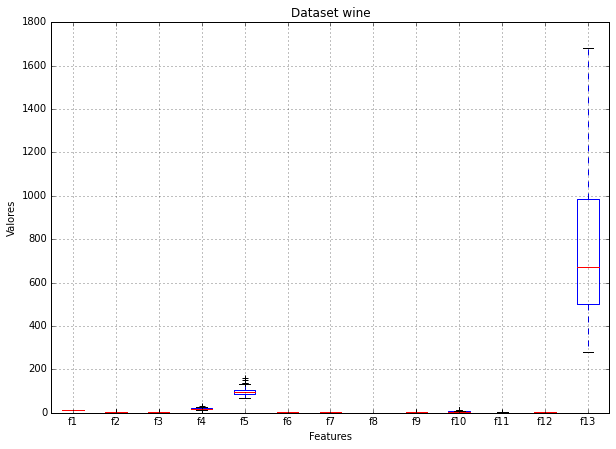

In [ ]:
import matplotlib.pyplot as plt

wine2 = leerArchivo('/content/Introduccion_Mineria_Datos/PRACTICAS/misDatasets/wine.data',
                   ['label', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6','f7', 'f8', 'f9', 'f10', 'f11', 'f12','f13'])
col_features2 = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6','f7', 'f8', 'f9', 'f10', 'f11', 'f12','f13']
wine_X2=wine2[col_features2]
wine_y2=wine2['label']

plt.figure(figsize = (10, 7))
wine_X2.boxplot()
plt.xlabel('Features')
plt.ylabel('Valores')
plt.title('Dataset wine')
plt.show()

Generamos el boxplot del dataset breast cancer

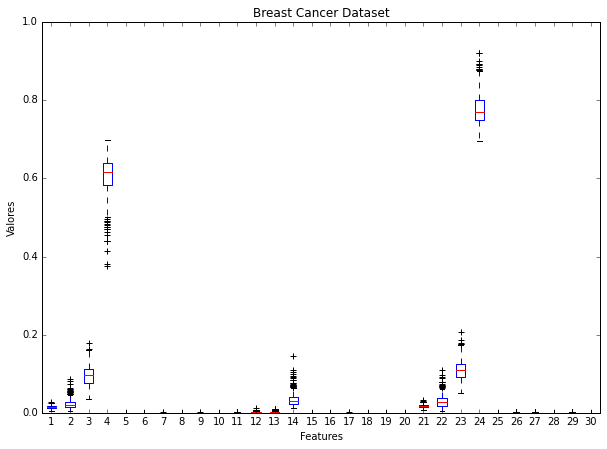

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
data_norm = preprocessing.normalize(breast_cancer_X)
plt.boxplot(data_norm)
plt.title('Breast Cancer Dataset')
plt.xlabel('Features')
plt.ylabel('Valores')
plt.show()

Generamos el boxplot del dataset diabetes

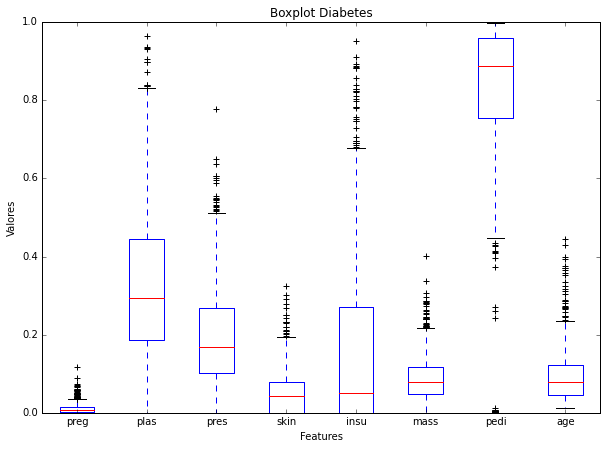

In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

plt.figure(figsize = (10, 7))
# Normalizamos los resultados
data_norm = preprocessing.normalize(diabetes_X)
# Generamos un boxplot del dataset diabetes
plt.boxplot(data_norm, labels = diabetes_features)
plt.title('Boxplot Diabetes')
# Eje X
plt.xlabel('Features')
# Eje Y
plt.ylabel('Valores')
plt.show()


Generamos el boxplot del dataset cpu

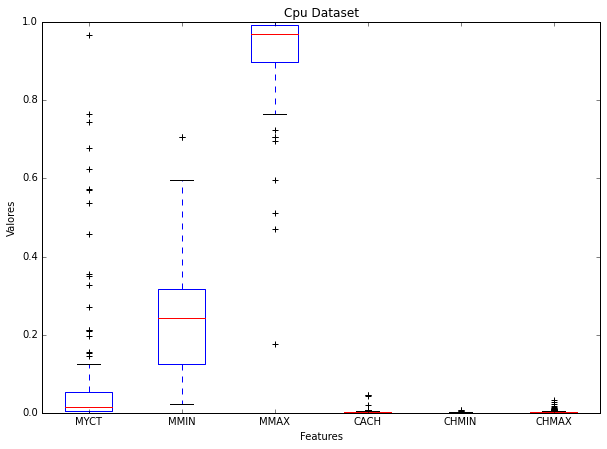

In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.figure(figsize = (10, 7))
data_norm = preprocessing.normalize(cpu_X)
plt.boxplot(data_norm, labels=cpu_features)
plt.title('Cpu Dataset')
plt.xlabel('Features')
plt.ylabel('Valores')
plt.show()

Generamos un boxplot por clase del dataset iris

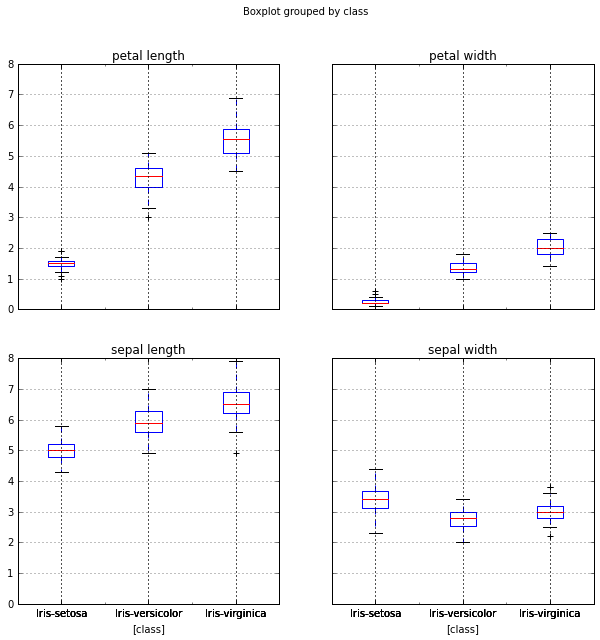

In [ ]:
import matplotlib.pyplot as plt
iris.boxplot(by="class",figsize=(10,10))
plt.show()



# Ejercicio 3. scatter plot matricial de los dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Generamos el scatter plot matricial del dataset iris

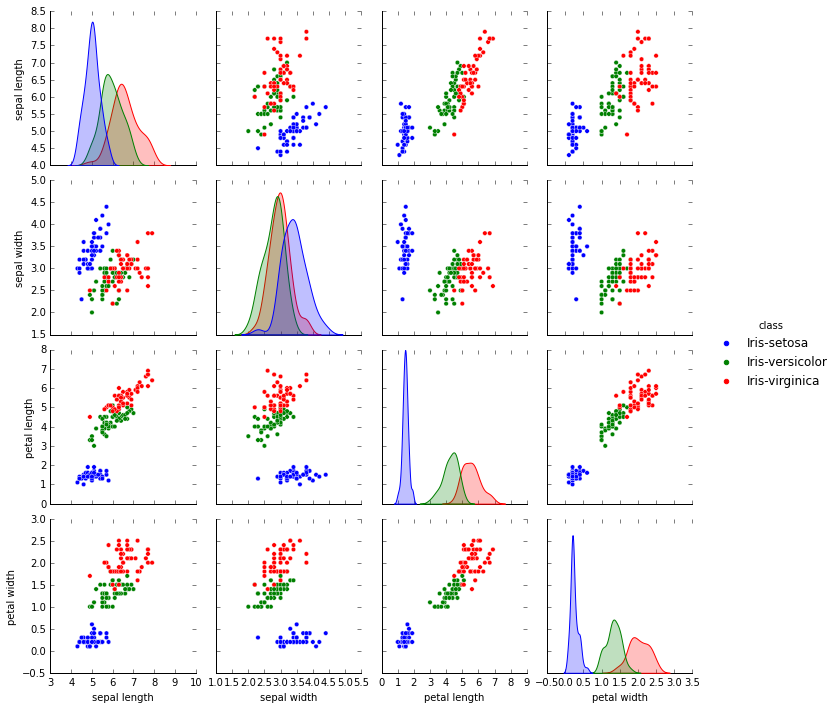

In [ ]:
sns.pairplot(iris, hue="class")

Generamos el scatter plot del dataset wine

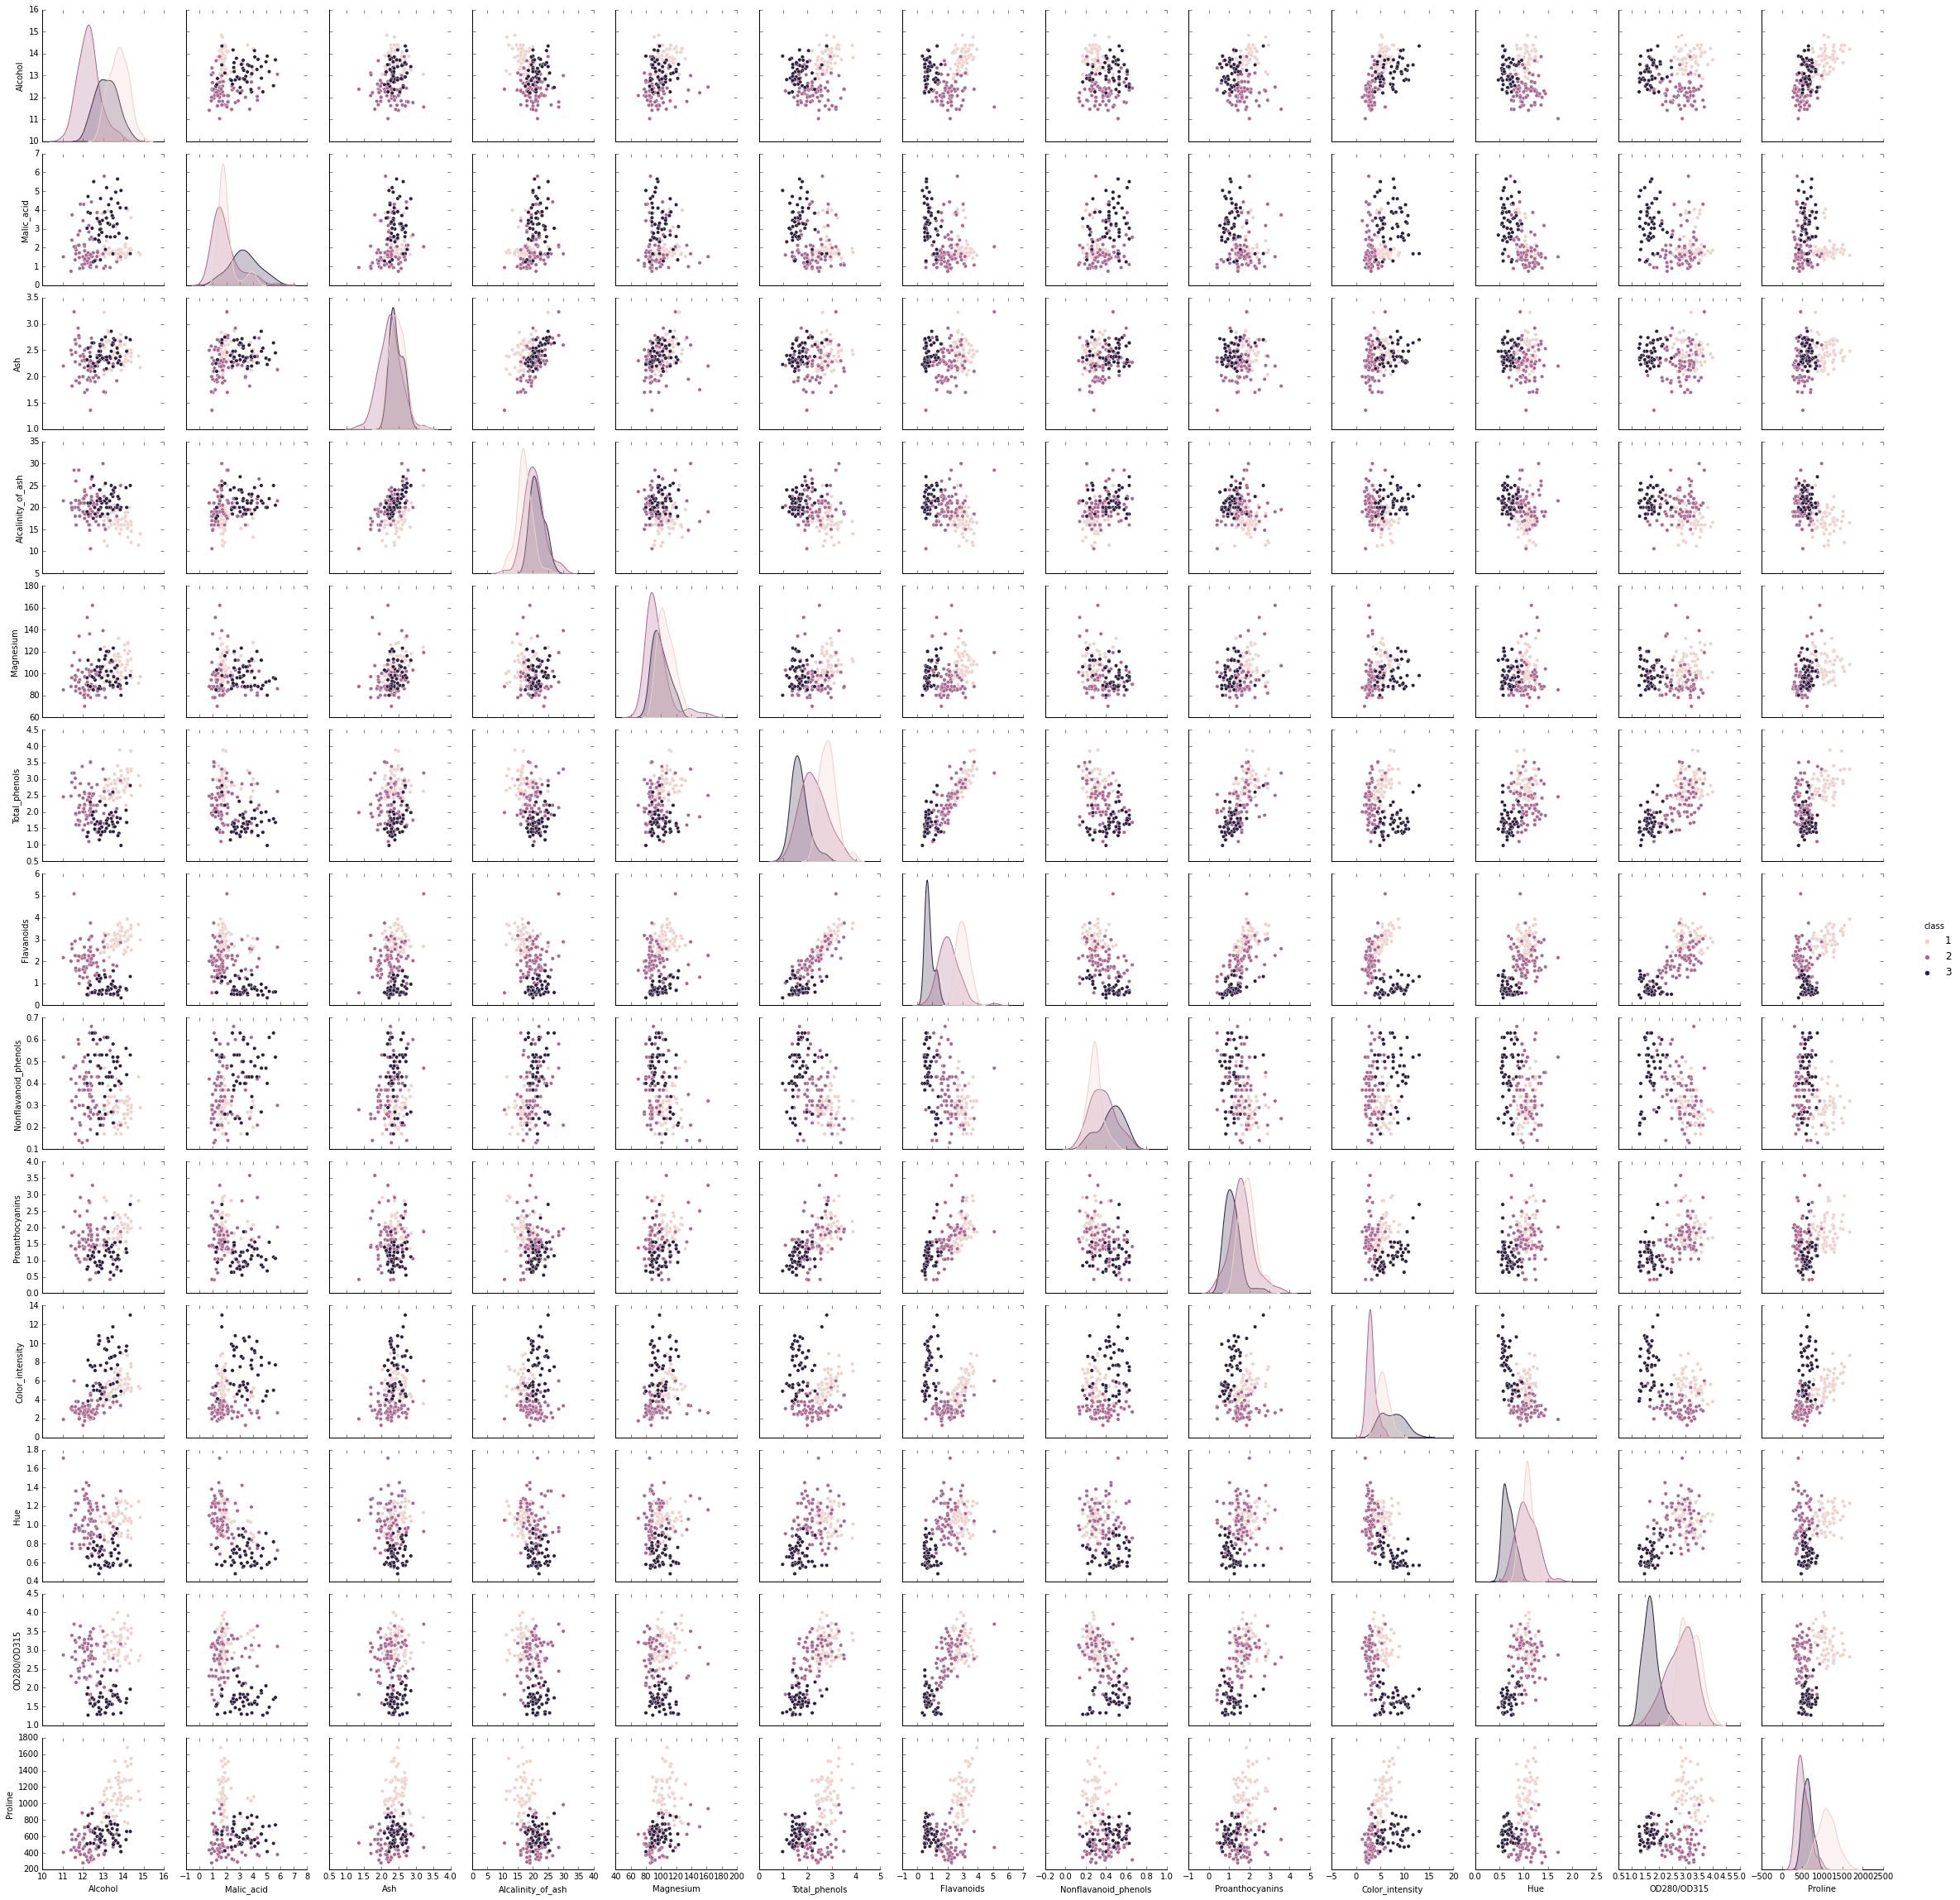

In [ ]:
sns.pairplot(wine, hue="class")

Scatter plot matricial del dataset breast cancer

In [ ]:
sns.pairplot(pd.DataFrame(breast_cancer_X, columns=breast_cancer.feature_names))

Generamos el scatter plot matricial del dataset diabetes

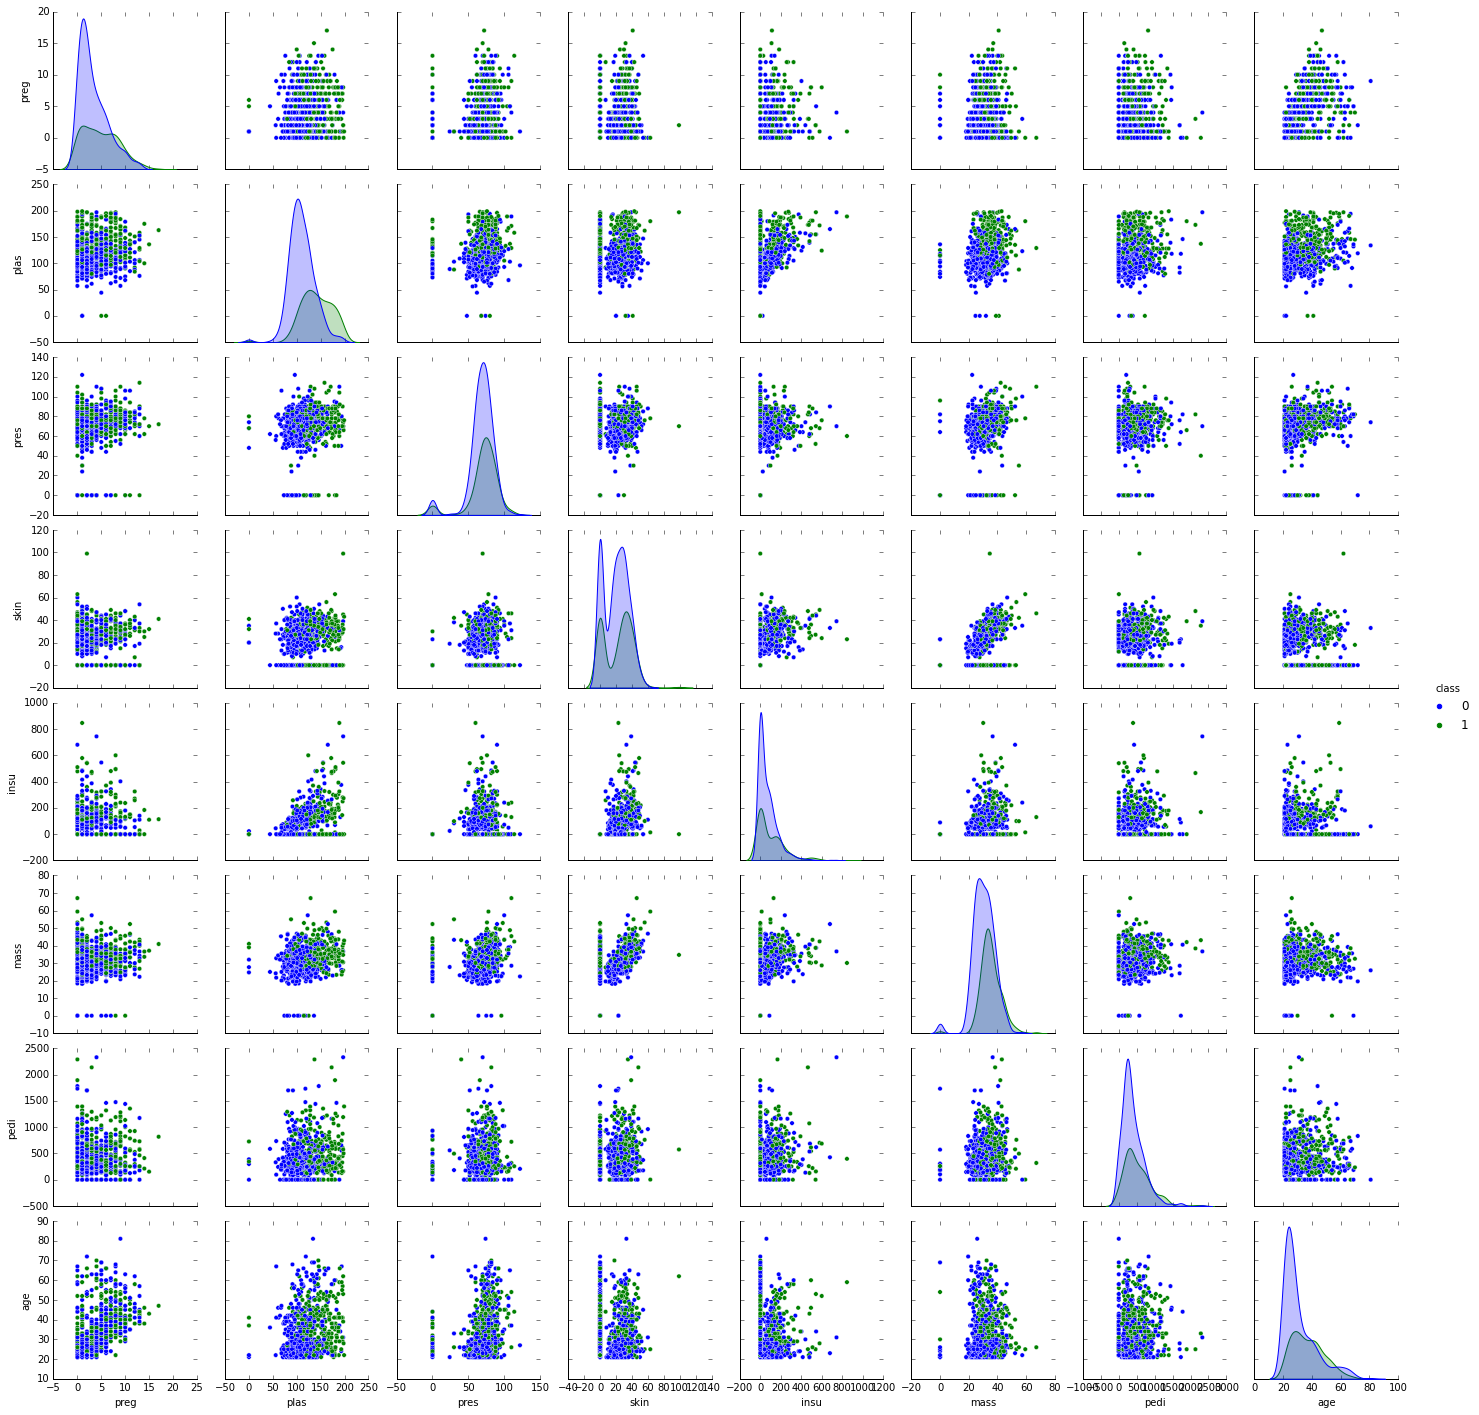

In [ ]:
sns.pairplot(diabetes, hue="class")

Generamos el scatter plot matricial del dataset cpu

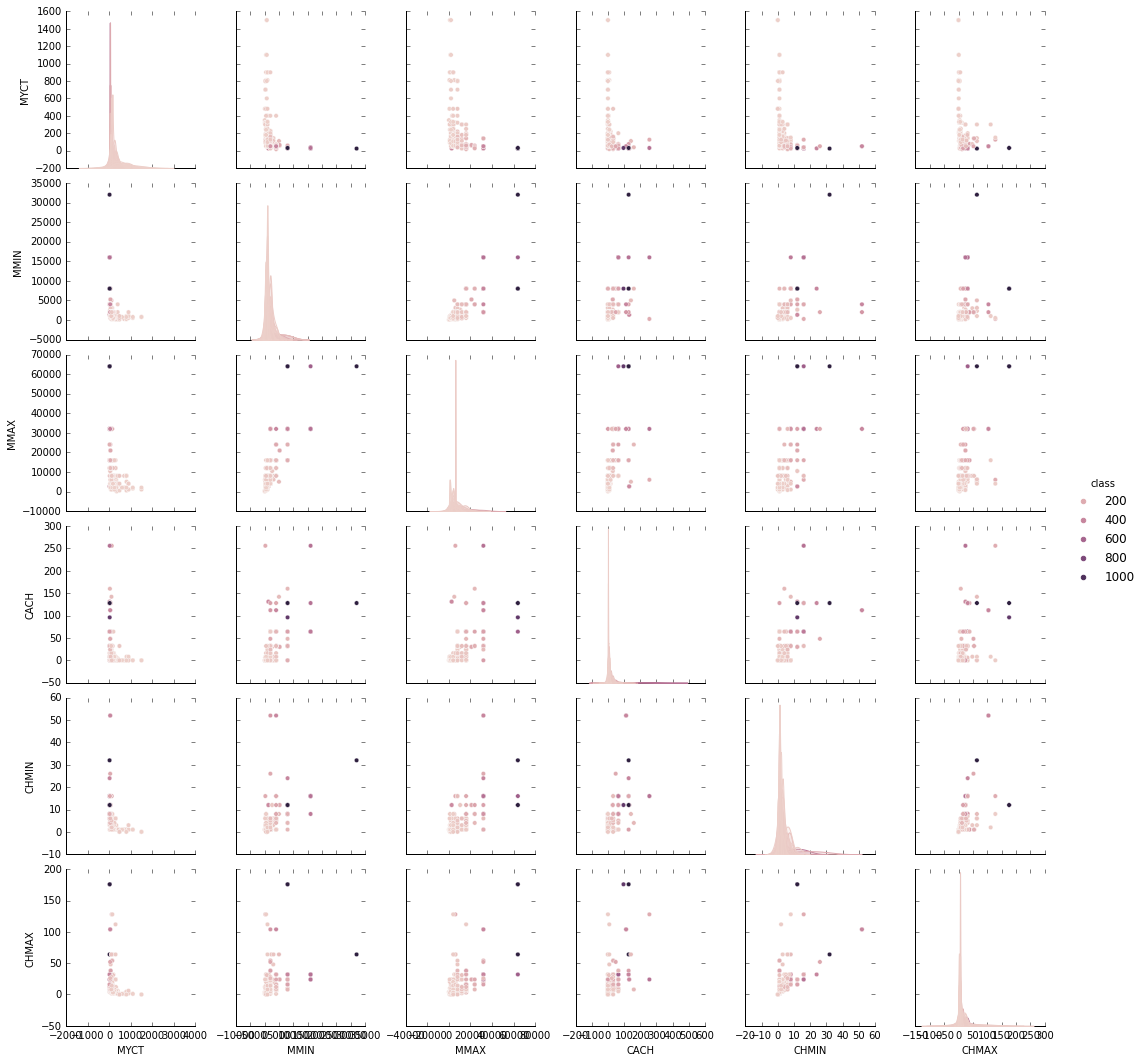

In [ ]:
sns.pairplot(cpu, hue="class")

# Ejercicio 4. Matriz de correlación entre las variables usando un mapa de calor

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Generamos el mapa de calor del dataset iris



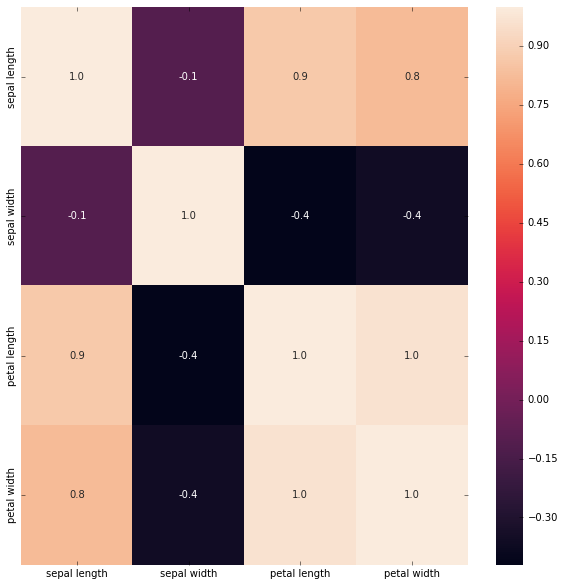

In [182]:
plt.figure(figsize=(10,10))
sns.heatmap(iris.corr(), annot=True, fmt='.1f')


Generamos la matriz de correlación del dataset wine

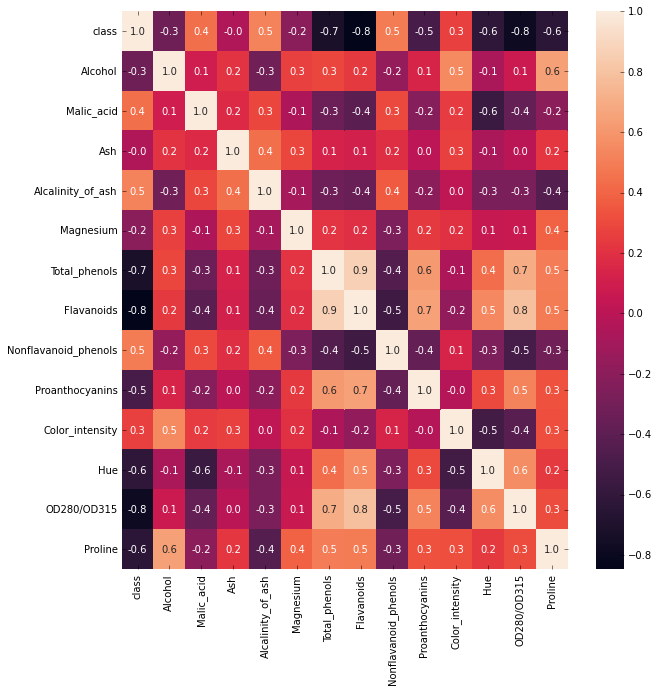

In [184]:
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(), annot=True, fmt='.1f')

Representamos la matriz de correlación del dataset diabetes

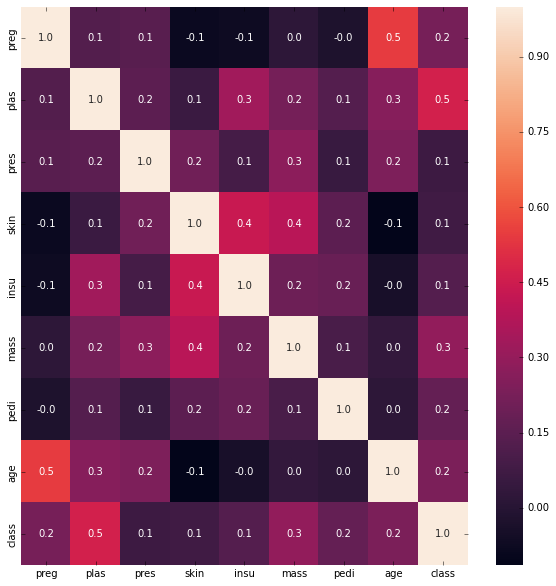

In [185]:
plt.figure(figsize=(10,10))
sns.heatmap(diabetes.corr(), annot=True, fmt='.1f')

Representamos la matriz de correlacion del dataset breast cancer

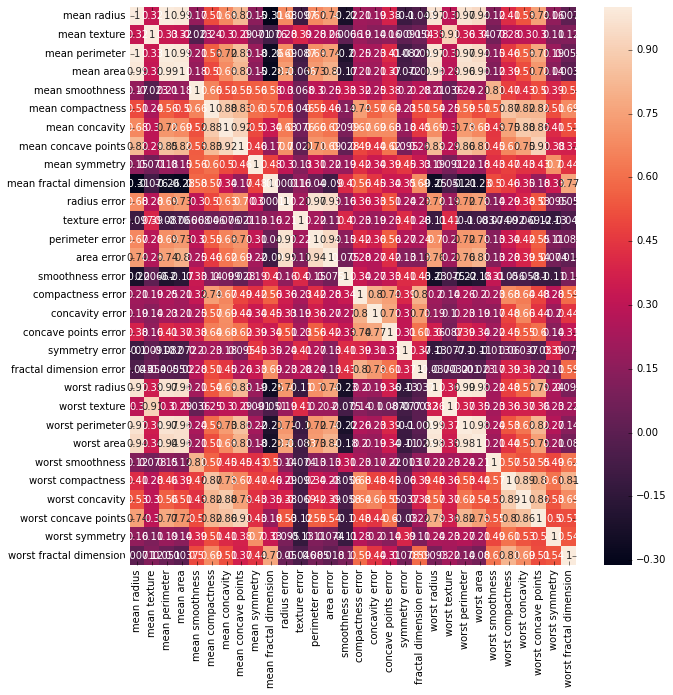

In [191]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names).corr(), annot=True)

Representamos la matriz de correlación del dataset cpu

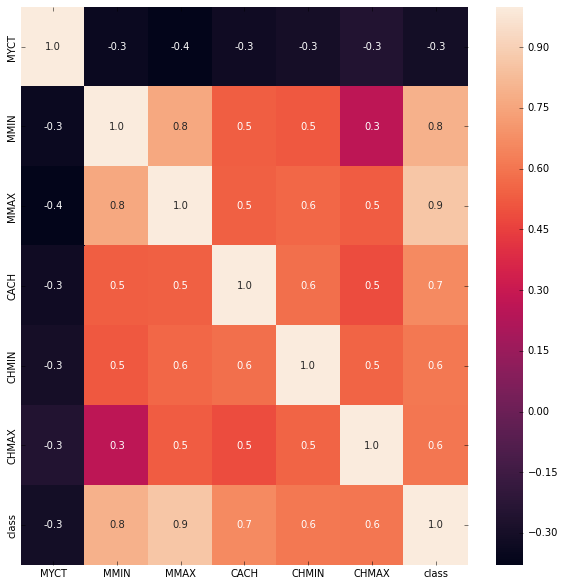

In [192]:
plt.figure(figsize=(10,10))
sns.heatmap(cpu.corr(), annot=True, fmt='.1f')

# Ejercicio 5. Matriz de correlación entre las instancias

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Representamos la matriz de correlación entre instancias del dataset iris

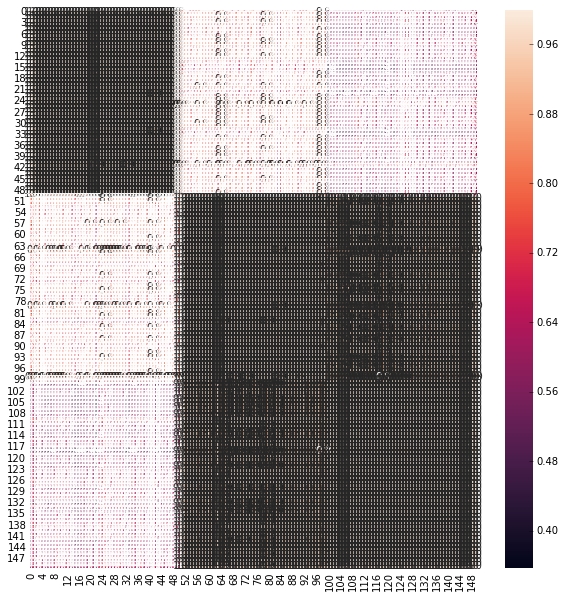

In [193]:
plt.figure(figsize=(10,10))
sns.heatmap(iris_X.T.corr(), annot=True, fmt='.1f')

Representamos la matriz de correlación entre instancias del dataset wine

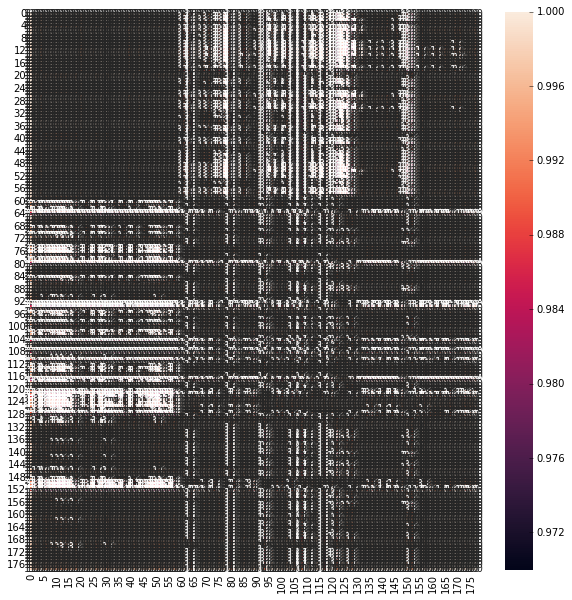

In [197]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_X.T.corr(), annot=True, fmt='.1f')

Dataset diabetes

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_X.T.corr(), annot=True, fmt='.1f')

Dataset breast cancer

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names).T.corr(), annot=True)

Dataset cpu

In [202]:
plt.figure(figsize=(10,10))
sns.heatmap(cpu_X.T.corr(), annot=True, fmt='.1f')

Error in callback <function flush_figures at 0x7f0f4de088b0> (for post_execute):


KeyboardInterrupt: ignored